In [1]:
# Setting the random seed for numpy
import numpy as np
np.random.seed(123)

In [2]:
# Setting the random seed for tensorflow
import tensorflow as tf
tf.random.set_seed(123)

In [3]:
# Importing other basic packages that will be used throughout
import pandas as pd
import scipy
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [4]:
# Importing tools for managing the folders
import os, shutil

In [5]:
# Setting a base folder path to access the dataset
base_folder = 'data/chest_xray/'
os.listdir(base_folder)

['.DS_Store', 'test', 'train', 'val']

In [6]:
# Creating folder paths and defining a new directory
test_dir = base_folder+'test/'
train_dir = base_folder+'train/'
val_dir = base_folder+'val/'
new_dir = 'data/'

In [7]:
train_normal = train_dir+'NORMAL/'
train_pneumonia = train_dir+'PNEUMONIA/'
test_normal = test_dir+'NORMAL/'
test_pneumonia = test_dir+'PNEUMONIA/'
val_normal = val_dir+'NORMAL/'
val_pneumonia = val_dir+'PNEUMONIA/'

In [8]:
# Redefining image list variables in seperate cell to be able to run on a 
# kernel restart
test_normal_imgs = os.listdir(test_normal)
test_pneumonia_imgs = os.listdir(test_pneumonia)

val_normal_imgs = os.listdir(val_normal)
val_pneumonia_imgs = os.listdir(val_pneumonia)

train_normal_imgs = os.listdir(train_normal)
train_pneumonia_imgs = os.listdir(train_pneumonia)

Preparing the **Training** Dataset

In [10]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir+'NORMAL/'
pneumonia_cases_dir = train_dir+'PNEUMONIA/'

# Get the list of all the images

normal_cases = [file for file in os.listdir(normal_cases_dir) if file.endswith('.jpeg')]
pneumonia_cases = [file for file in os.listdir(pneumonia_cases_dir) if file.endswith('.jpeg')]

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,NORMAL2-IM-0914-0001.jpeg,0
1,person1187_virus_2023.jpeg,1
2,person1663_bacteria_4412.jpeg,1
3,person692_virus_1286.jpeg,1
4,person773_virus_1402.jpeg,1


Preparing the **Testing** Dataset

In [11]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = test_dir+'NORMAL/'
pneumonia_cases_dir = test_dir+'PNEUMONIA/'

# Get the list of all the images

normal_cases = [file for file in os.listdir(normal_cases_dir) if file.endswith('.jpeg')]
pneumonia_cases = [file for file in os.listdir(pneumonia_cases_dir) if file.endswith('.jpeg')]

# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    test_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
test_data.head()

,image,label
0,person117_bacteria_553.jpeg,1
1,NORMAL2-IM-0311-0001.jpeg,0
2,IM-0023-0001.jpeg,0
3,person1662_virus_2875.jpeg,1
4,NORMAL2-IM-0374-0001-0001.jpeg,0


Preparing the **Validation** Dataset

In [12]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = val_dir+'NORMAL/'
pneumonia_cases_dir = val_dir+'PNEUMONIA/'

# Get the list of all the images

normal_cases = [file for file in os.listdir(normal_cases_dir) if file.endswith('.jpeg')]
pneumonia_cases = [file for file in os.listdir(pneumonia_cases_dir) if file.endswith('.jpeg')]

# An empty list. We will insert the data into this list in (img_path, label) format
val_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    val_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    val_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
val_data = pd.DataFrame(val_data, columns=['image', 'label'],index=None)

# Shuffle the data 
val_data = val_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
val_data.head()

,image,label
0,person1949_bacteria_4880.jpeg,1
1,NORMAL2-IM-1436-0001.jpeg,0
2,NORMAL2-IM-1431-0001.jpeg,0
3,NORMAL2-IM-1427-0001.jpeg,0
4,person1952_bacteria_4883.jpeg,1


How many samples for each class are there in the dataset?

1    3875
0    1341
Name: label, dtype: int64


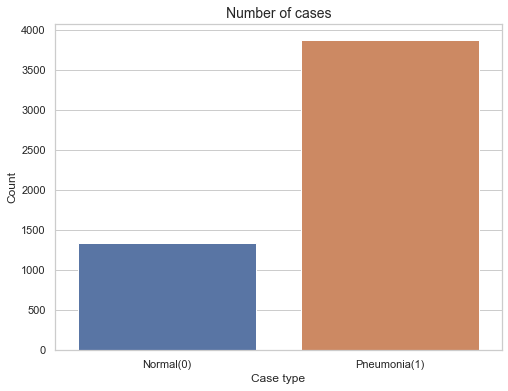

In [47]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(8,6))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [16]:
# Checking the sizes of all the new folders
print(len(test_normal_imgs))
print(len(test_pneumonia_imgs))
test_size = len(test_normal_imgs) + len(test_pneumonia_imgs)
print('Total test set size:', test_size)

print(len(val_normal_imgs))
print(len(val_pneumonia_imgs))
val_size = len(val_normal_imgs) + len(val_pneumonia_imgs)
print('Total validation set size:', val_size)

print(len(train_normal_imgs))
print(len(train_pneumonia_imgs))
train_size = len(train_normal_imgs) + len(train_pneumonia_imgs)
print('Total train set size:', train_size)

234
390
Total test set size: 624
9
9
Total validation set size: 18
1342
3876
Total train set size: 5218


In [14]:
# Creating an datagenerator object that will perform image augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=90, 
                                   width_shift_range=.2, 
                                   height_shift_range=.2, 
                                   shear_range=.2, 
                                   zoom_range=.2, 
                                   horizontal_flip=True, 
                                   brightness_range=[.5, 1.5])

# Datagenerators for the test and validation set will only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Applying the datagenerator objects to the images in the folders
image_size = (96, 96)
training_set = train_datagen.flow_from_directory(train_dir, 
                                                 target_size=image_size, 
                                                 class_mode='binary')

val_set = val_datagen.flow_from_directory(val_dir,
                                          target_size=image_size, 
                                          class_mode='binary', 
                                          batch_size=val_size)

test_set = test_datagen.flow_from_directory(test_dir, 
                                            target_size=image_size, 
                                            class_mode='binary', 
                                            batch_size=test_size)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Looking at the Images

We want to explore the visual differences between normal and pneumonia cases to get an idea what sort of things the model may pick up on for classsifaication

In [36]:
def create_tensors(path_list):
    '''
    Generate tensors to be able to plot on axes
    
    Args:
        path_list (list of strings): Folder paths for images
    
    Returns:
        List of tensor arrays
    
    Example:
        create_tensors(image_path_list)
    '''
#   Create empty list
    tensors = []
    
#   Loop through paths to grab each image for processing and add to tensor list
    for path in path_list:
        img = load_img(path, target_size=(96, 96))
        img_tensor = img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.
        tensors.append(img_tensor)
        
    return tensors

In [42]:
# Creating pathways for three normal images to visualize
img_path1 = train_normal+'/IM-0115-0001.jpeg'
img_path2 = train_normal+'/IM-0117-0001.jpeg'
img_path3 = train_normal+'/IM-0119-0001.jpeg'

# Put pathways into a list
normal_paths = [img_path1, img_path2, img_path3]
normal_tensors = create_tensors(normal_paths)

In [44]:
# Creating pathways for three normal images to visualize
img_path4 = train_pneumonia+'/person773_virus_1402.jpeg'
img_path5 = train_pneumonia+'/person1187_virus_2023.jpeg'
img_path6 = train_pneumonia+'/person692_virus_1286.jpeg'

pneumonia_paths = [img_path4, img_path5, img_path6]
pneumonia_tensors = create_tensors(pneumonia_paths)

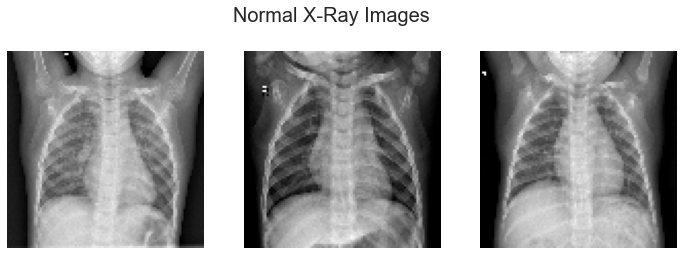

In [45]:
# Plot all three images together with each on a subplot
fig = plt.figure(figsize=(12,8))
fig.suptitle('Normal X-Ray Images', fontsize=20, y=.75);
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(normal_tensors[0][0])
ax1.axis('off')

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(normal_tensors[1][0])
ax2.axis('off')

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(normal_tensors[2][0])
ax3.axis('off');

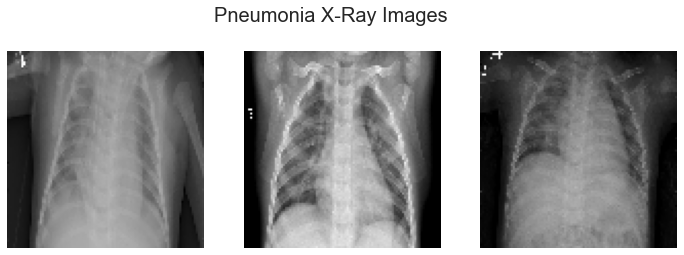

In [46]:
# Plot all three images together with each on a subplot
fig = plt.figure(figsize=(12,8))
fig.suptitle('Pneumonia X-Ray Images', fontsize=20, y=.75);
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(pneumonia_tensors[0][0])
ax1.axis('off')

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(pneumonia_tensors[1][0])
ax2.axis('off')

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(pneumonia_tensors[2][0])
ax3.axis('off');
